In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/home/barani/Desktop/barani2/DataScience Learning/Upgrad/Week 5 - Data Visualization/Case+Study+Notebook/Case Study Notebook/googleplaystore_v2.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.shape

(10841, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
df1=df[-df.Rating.isnull()]

In [7]:
df1.shape

(9367, 13)

In [8]:
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [9]:
df['Android Ver'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Name: Android Ver, Length: 10841, dtype: bool

In [10]:
df1[(df1['Android Ver'].isnull()& (df1.Category=='1.9'))]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
df1=df1[-(df1['Android Ver'].isnull()& (df1.Category=='1.9'))]

In [12]:
df1[(df1['Android Ver'].isnull()& (df1.Category=='1.9'))]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [13]:
df1[df1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [14]:
df1['Android Ver'].mode()[0]

'4.1 and up'

#### Filling NA value with the most repeatative value

In [15]:
df1['Android Ver'] = df1['Android Ver'].fillna(df1['Android Ver'].mode()[0]) 

In [16]:
df1[df1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [17]:
df1['Android Ver'].value_counts()

4.1 and up            2061
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
1.0 and up               2
5.0 - 8.0                2
4.0.3 - 7.1.1            2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [18]:
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [19]:
df1[df1['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [20]:
df1['Current Ver'].mode()[0]

'Varies with device'

In [21]:
df1['Current Ver']=df1['Current Ver'].fillna(df1['Current Ver'].mode()[0])

In [22]:
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [23]:
df1['Current Ver'].value_counts()

Varies with device      1419
1.0                      458
1.1                      195
1.2                      126
1.3                      120
                        ... 
1.5.1.182070924            1
2.0.17.9                   1
The CJ Rubric 7.12.0       1
3.953                      1
5.26.0                     1
Name: Current Ver, Length: 2638, dtype: int64

In [24]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [25]:
df2=df1[df1['Android Ver']=='4.1 and up']

In [26]:
df2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10,Text on Photo - Fonteee,ART_AND_DESIGN,4.4,13880,28000.0,"1,000,000+",Free,0,Everyone,Art & Design,"October 27, 2017",1.0.4,4.1 and up
12,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.2,44829,20000.0,"10,000,000+",Free,0,Teen,Art & Design,"April 2, 2018",3.8,4.1 and up
16,Photo Designer - Write your name with shapes,ART_AND_DESIGN,4.7,3632,5500.0,"500,000+",Free,0,Everyone,Art & Design,"July 31, 2018",3.1,4.1 and up
19,ibis Paint X,ART_AND_DESIGN,4.6,224399,31000.0,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",5.5.4,4.1 and up
20,Logo Maker - Small Business,ART_AND_DESIGN,4.0,450,14000.0,"100,000+",Free,0,Everyone,Art & Design,"April 20, 2018",4.0,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8600.0,"1,000+",Free,0,Teen,Education,"June 27, 2018",3.8.0,4.1 and up
10829,Bulgarian French Dictionary Fr,BOOKS_AND_REFERENCE,4.6,603,7400.0,"10,000+",Free,0,Everyone,Books & Reference,"June 19, 2016",2.96,4.1 and up
10834,FR Calculator,FAMILY,4.0,7,2600.0,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up


In [30]:
df1['Price'].value_counts()

0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
           ... 
$1.97         1
$1.29         1
$299.99       1
$2.90         1
$1.61         1
Name: Price, Length: 73, dtype: int64

### Removing $ symbol and make the colum as float data type

In [33]:
df1['Price']=df1.Price.apply(lambda x: 0 if x=='0' else float(x[1:]))

In [35]:
df1['Price']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10834    0.0
10836    0.0
10837    0.0
10839    0.0
10840    0.0
Name: Price, Length: 9366, dtype: float64

In [38]:
df1['Reviews'].value_counts()

2          83
3          78
5          74
4          74
1          67
           ..
6271        1
1092367     1
8348        1
29270       1
114851      1
Name: Reviews, Length: 5992, dtype: int64

### Converting the Reviews column data type as Int

In [39]:
df1.Reviews=df1.Reviews.astype('int32')

In [45]:
df1['Reviews'].value_counts()  #Changed successfully

2         83
3         78
5         74
4         74
1         67
          ..
47386      1
624924     1
33053      1
4383       1
739329     1
Name: Reviews, Length: 5992, dtype: int64

In [51]:
df1['Installs'].describe()

count           9366
unique            19
top       1,000,000+
freq            1577
Name: Installs, dtype: object

### Checking whether the Free apps having any price amount

In [54]:
df1[(df1.Type=='Free') & (df1.Price>0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


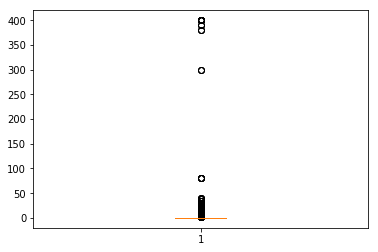

In [61]:
plt.boxplot(df1.Price)
plt.show()

In [69]:
df.Installs.describe()

count          10841
unique            22
top       1,000,000+
freq            1579
Name: Installs, dtype: object

(array([4060., 1698., 2872.,  656.,  481.,  338.,  240.,  168.,  123.,
         205.]), array([8.500000e+00, 1.000765e+04, 2.000680e+04, 3.000595e+04,
        4.000510e+04, 5.000425e+04, 6.000340e+04, 7.000255e+04,
        8.000170e+04, 9.000085e+04, 1.000000e+05]), <a list of 10 Patch objects>)

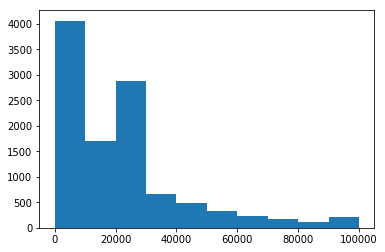

In [72]:
plt.hist(df.Size)

{'boxes': [<matplotlib.lines.Line2D at 0x7f7349d11ef0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7349c9c940>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7349ca45f8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f7349ca41d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7349c9c080>,
  <matplotlib.lines.Line2D at 0x7f7349c9c518>]}

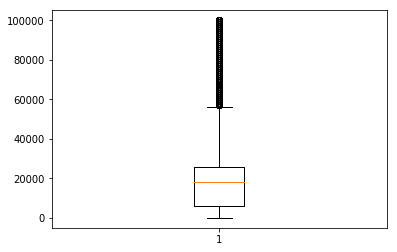

In [73]:
plt.boxplot(df.Size)